In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
track_features = pd.read_csv('/content/tf_mini.csv')
track_features

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,...,4,0.542063,-0.196001,0.301727,0.238880,-0.391421,0.016690,0.247235,-0.399387,-0.192473
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,...,4,0.472353,-0.545160,0.271596,0.274377,0.043951,-0.322946,0.150802,0.159378,0.384336
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,...,4,0.766519,0.112592,0.368523,-0.466950,-0.468494,0.640088,0.050771,-0.258999,0.258766
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,...,4,0.058505,-0.855291,0.365487,0.273034,0.108294,-0.206204,0.007847,-0.408226,0.143629


In [3]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [4]:
track_features.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [5]:
non_float = track_features[[i for i in track_features.columns if track_features[i].dtype != 'float64']]

In [6]:
non_float

,track_id,release_year,key,mode,time_signature
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,1950,0,major,4
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,1950,0,major,3
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,1951,0,minor,4
3,t_070a63a0-744a-434e-9913-a97b02926a29,1951,0,major,4
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,1951,0,major,4
...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,2018,11,major,4
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,2018,11,major,4
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,2018,11,major,4
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,2018,11,minor,4


In [7]:
non_float.drop(columns = 'track_id', axis = 1, inplace = True)
non_float

<ipython-input-7-5648af43915f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_float.drop(columns = 'track_id', axis = 1, inplace = True)


,release_year,key,mode,time_signature
0,1950,0,major,4
1,1950,0,major,3
2,1951,0,minor,4
3,1951,0,major,4
4,1951,0,major,4
...,...,...,...,...
50699,2018,11,major,4
50700,2018,11,major,4
50701,2018,11,major,4
50702,2018,11,minor,4


In [8]:
non_float['release_year']

0        1950
1        1950
2        1951
3        1951
4        1951
         ... 
50699    2018
50700    2018
50701    2018
50702    2018
50703    2018
Name: release_year, Length: 50704, dtype: int64

<ipython-input-9-9605e2b49493>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_float.release_year)


Text(0.5, 1.0, 'Distribution of Release Years')

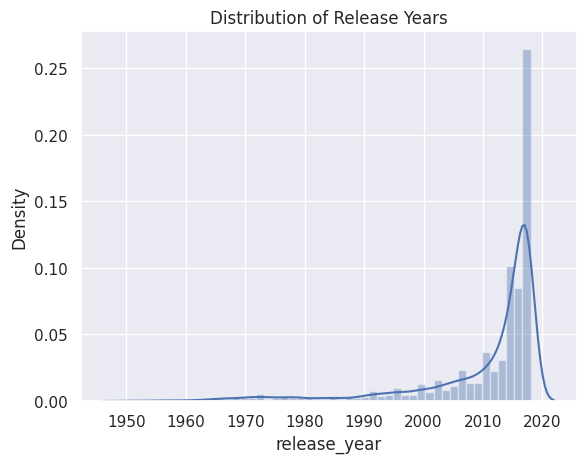

In [9]:
sns.distplot(non_float.release_year)
plt.title('Distribution of Release Years')

In [10]:
non_float['key'].value_counts()

1     6009
0     5513
7     5279
2     5017
9     4858
11    4084
5     4053
8     3799
4     3572
10    3503
6     3499
3     1518
Name: key, dtype: int64

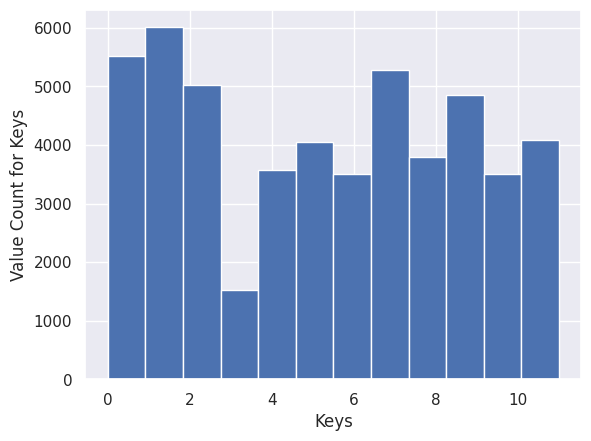

In [11]:
plt.hist(non_float['key'], bins = 12)
plt.xlabel('Keys')
plt.ylabel('Value Count for Keys')
plt.show()

In [12]:
non_float.time_signature.value_counts()

4    45521
3     3897
5      845
1      413
0       28
Name: time_signature, dtype: int64

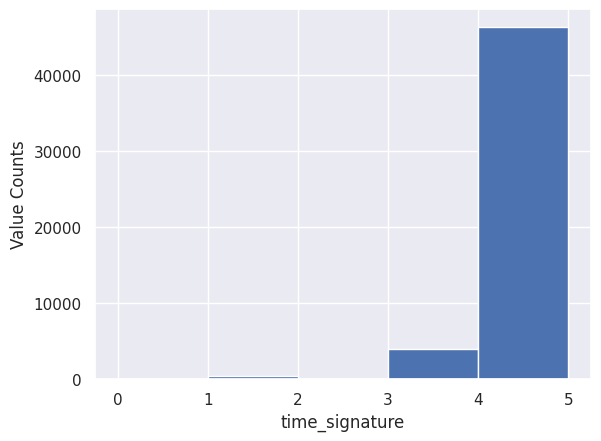

In [13]:
plt.hist(non_float['time_signature'], bins = 5)
plt.xlabel('time_signature')
plt.ylabel('Value Counts')
plt.show()

In [14]:
non_float['mode'].value_counts()

major    32555
minor    18149
Name: mode, dtype: int64

In [15]:
track_features['mode'] = (track_features['mode'] == 'major').astype('int64')
track_features['mode'].value_counts()

1    32555
0    18149
Name: mode, dtype: int64

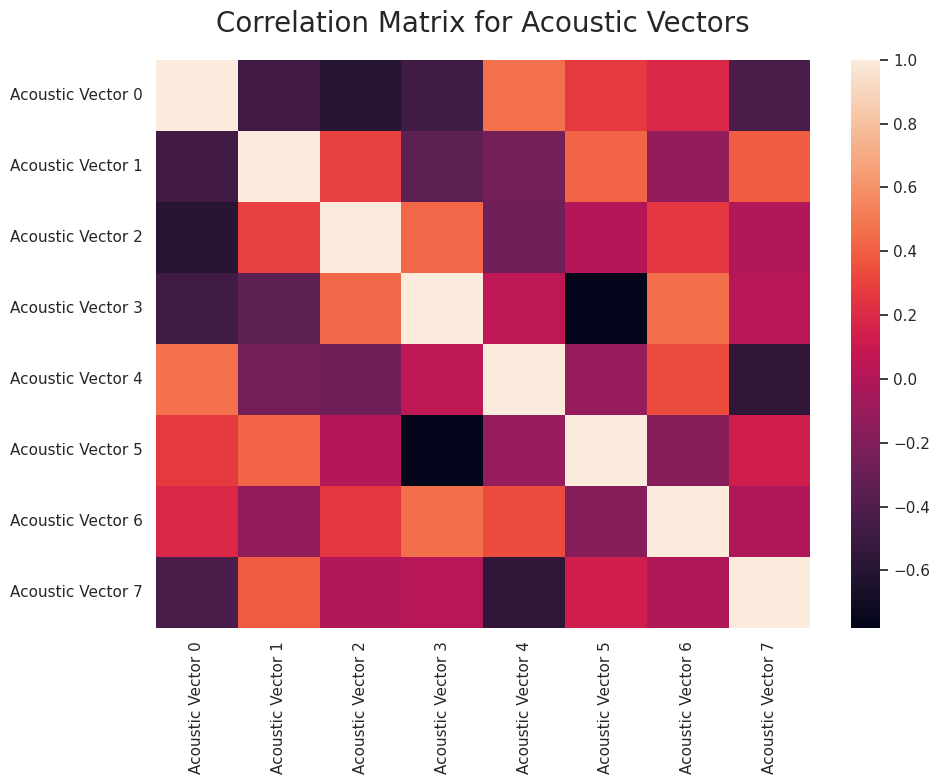

In [16]:
plt.figure(figsize=(10,8))

sns.heatmap(
    track_features[[
        "acoustic_vector_0",
        "acoustic_vector_1",
        "acoustic_vector_2",
        "acoustic_vector_3",
        "acoustic_vector_4",
        "acoustic_vector_5",
        "acoustic_vector_6",
        "acoustic_vector_7"
    ]].rename(
        columns={f"acoustic_vector_{i}":f"Acoustic Vector {i}" for i in range(8)}
    ).corr()
)

plt.title(
    "Correlation Matrix for Acoustic Vectors",
    fontsize=20,
    pad=20
)

plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

<ipython-input-17-af38751e1fc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(track_features.us_popularity_estimate)


Text(0.5, 1.0, 'us_popularity_estimate')

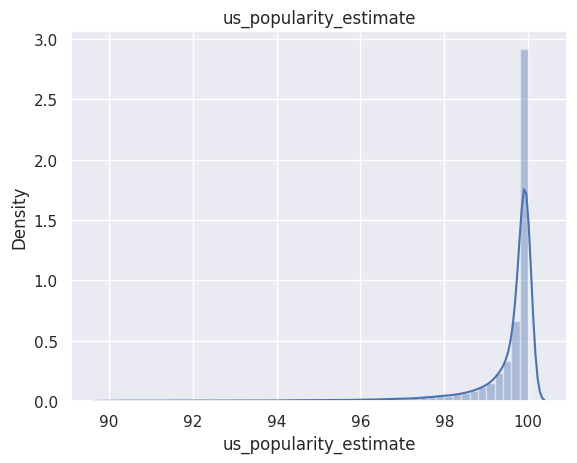

In [17]:
sns.distplot(track_features.us_popularity_estimate)
plt.title('us_popularity_estimate')

In [18]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [19]:
flag = track_features.drop(columns = 'track_id', axis = 1)
flag

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,1.042727,...,4,0.542063,-0.196001,0.301727,0.238880,-0.391421,0.016690,0.247235,-0.399387,-0.192473
50700,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,0.988095,...,4,0.472353,-0.545160,0.271596,0.274377,0.043951,-0.322946,0.150802,0.159378,0.384336
50701,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,0.870077,...,4,0.766519,0.112592,0.368523,-0.466950,-0.468494,0.640088,0.050771,-0.258999,0.258766
50702,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,4,0.058505,-0.855291,0.365487,0.273034,0.108294,-0.206204,0.007847,-0.408226,0.143629


In [20]:
flag.columns

Index(['duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object')

<ipython-input-21-ec9822669398>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1,2,figsize=(10,5))


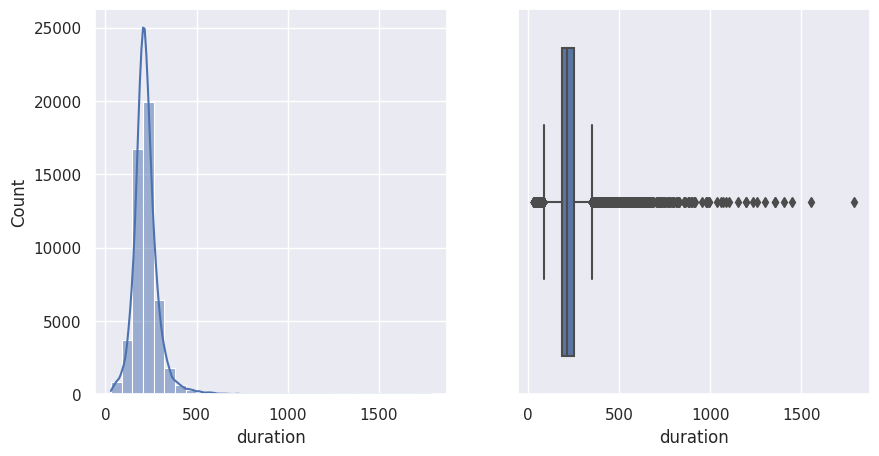

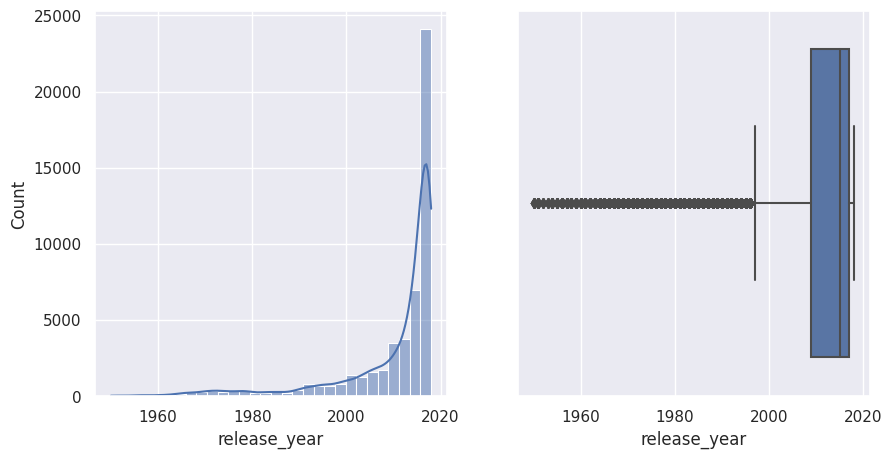

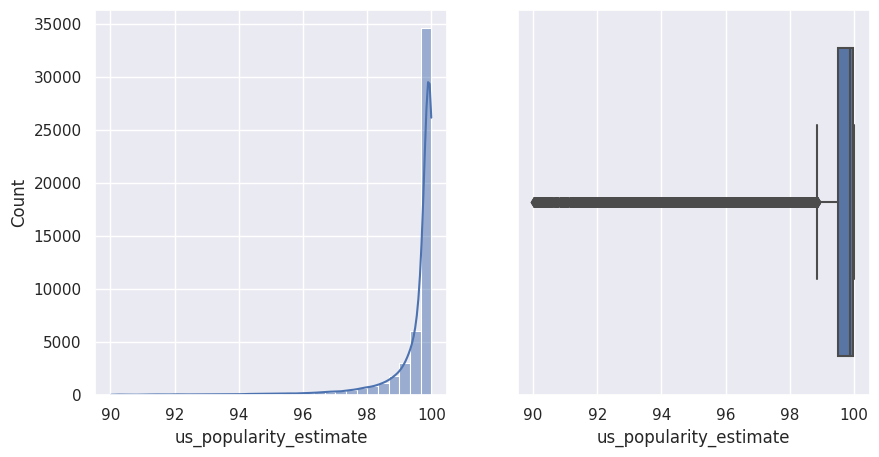

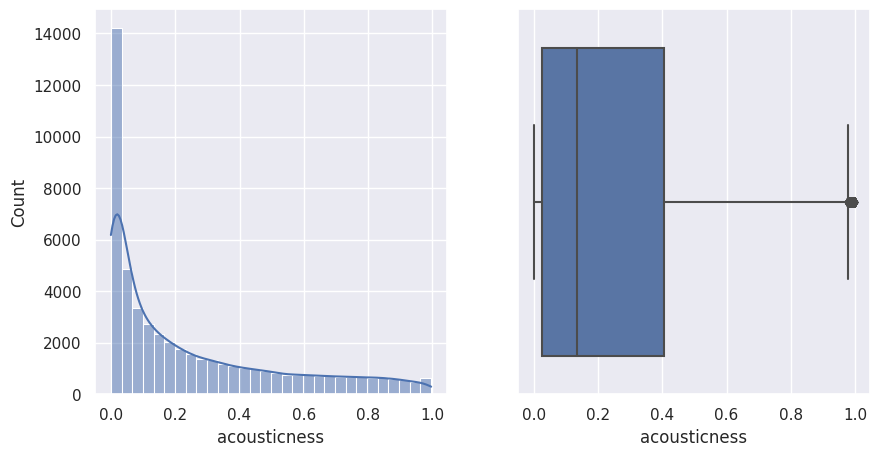

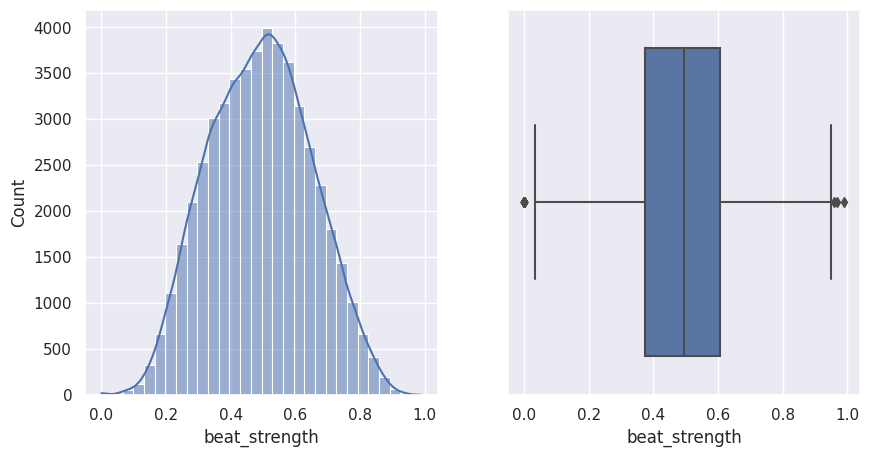

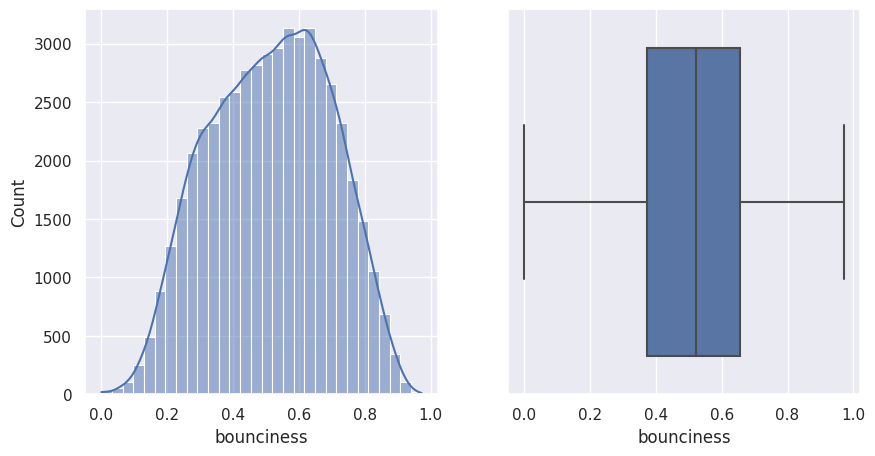

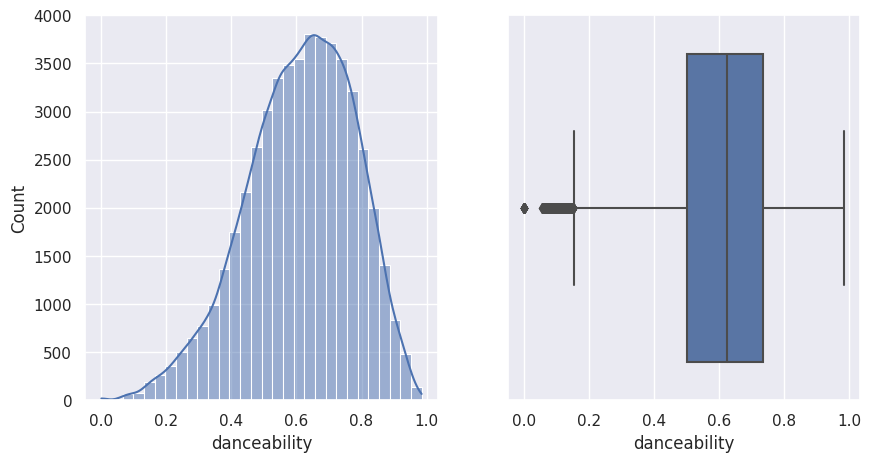

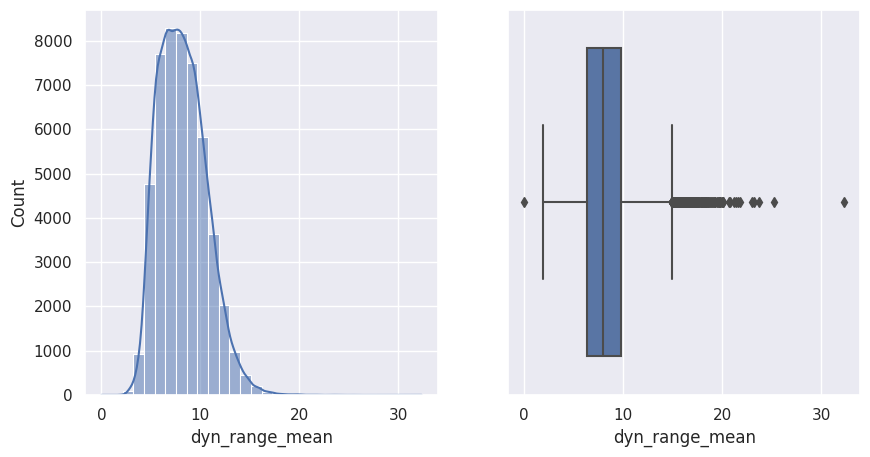

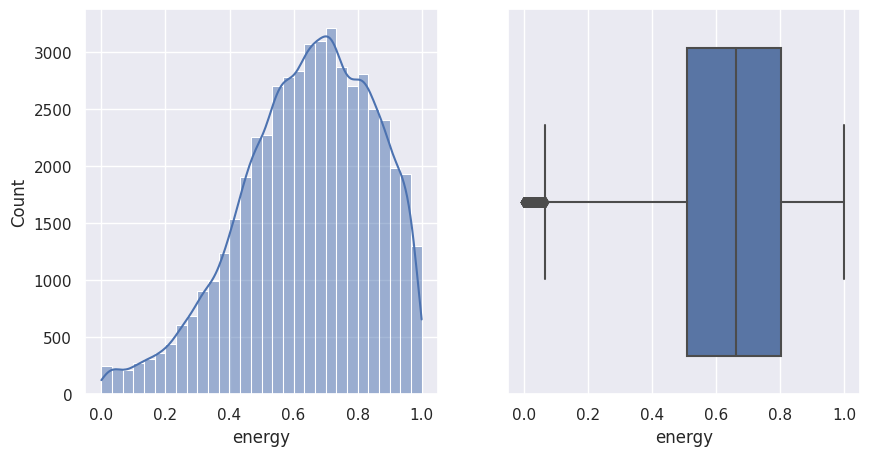

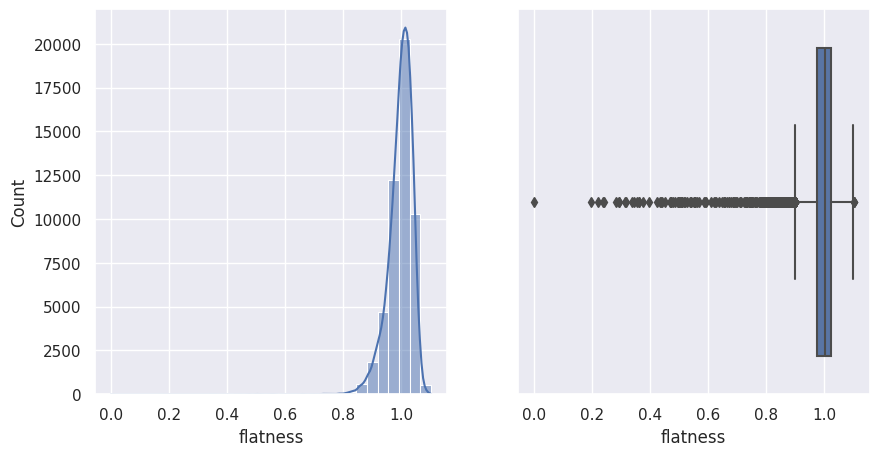

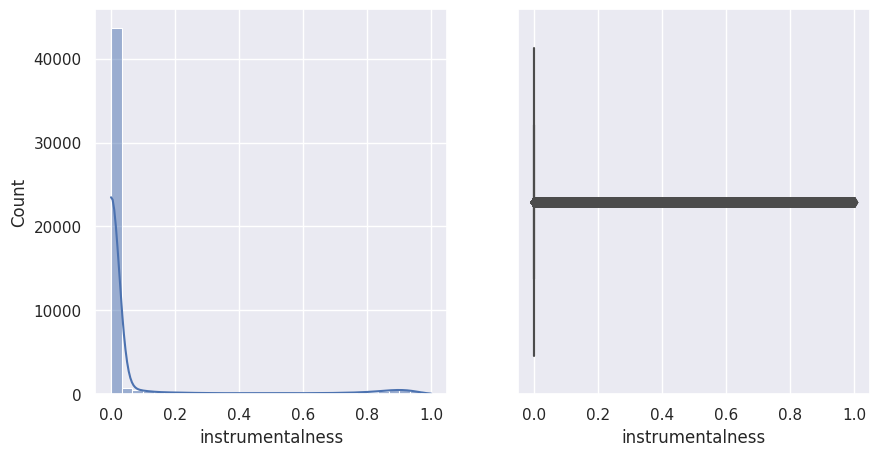

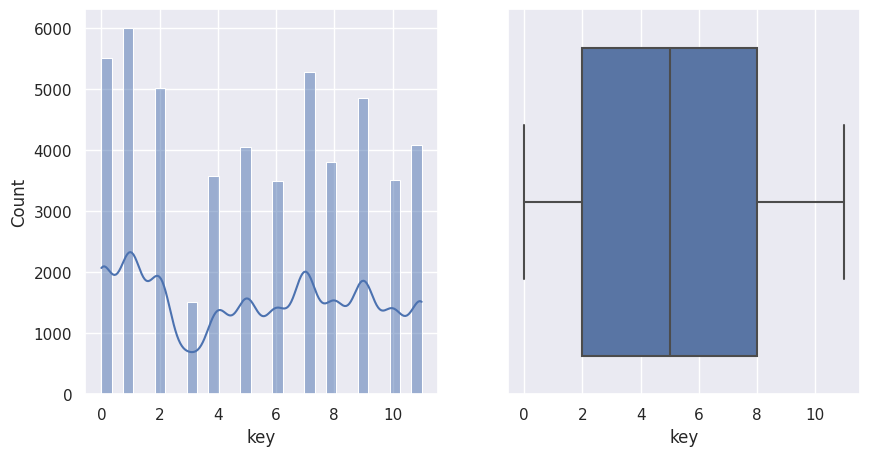

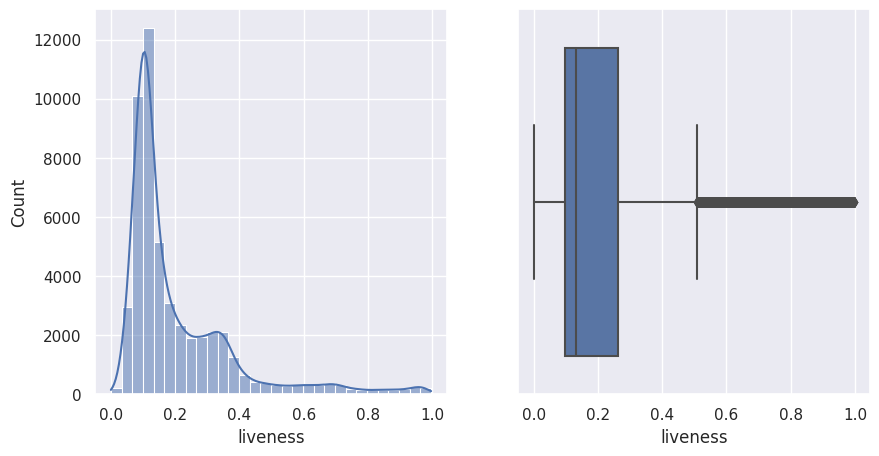

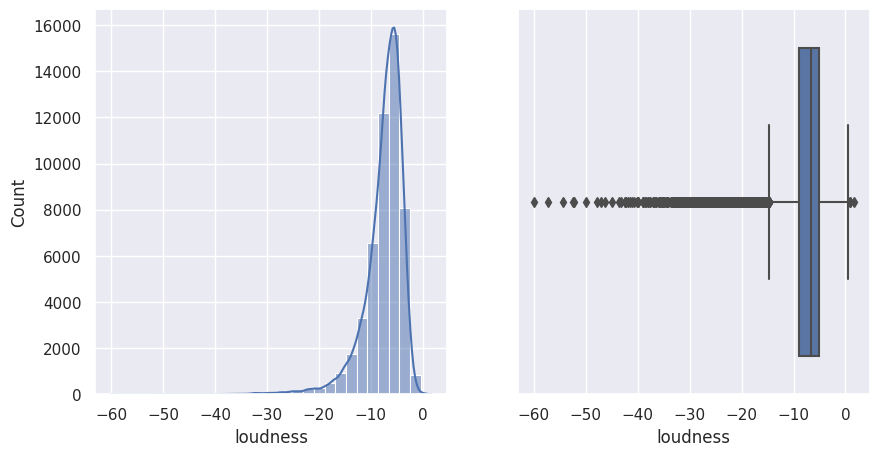

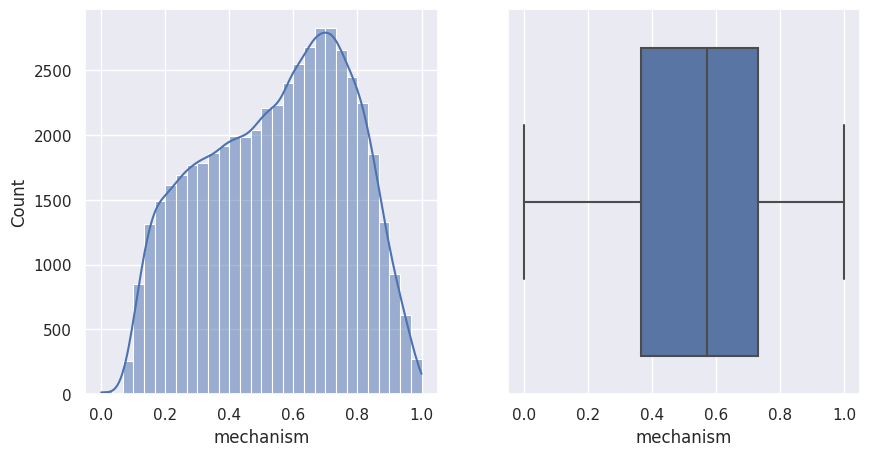

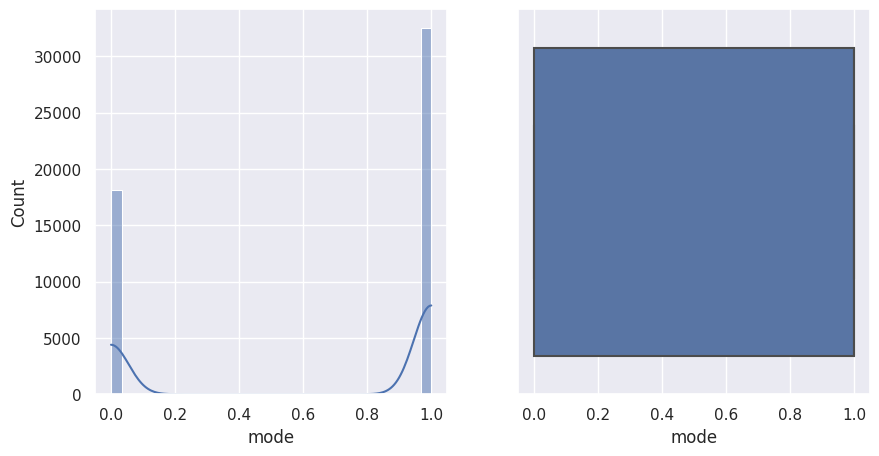

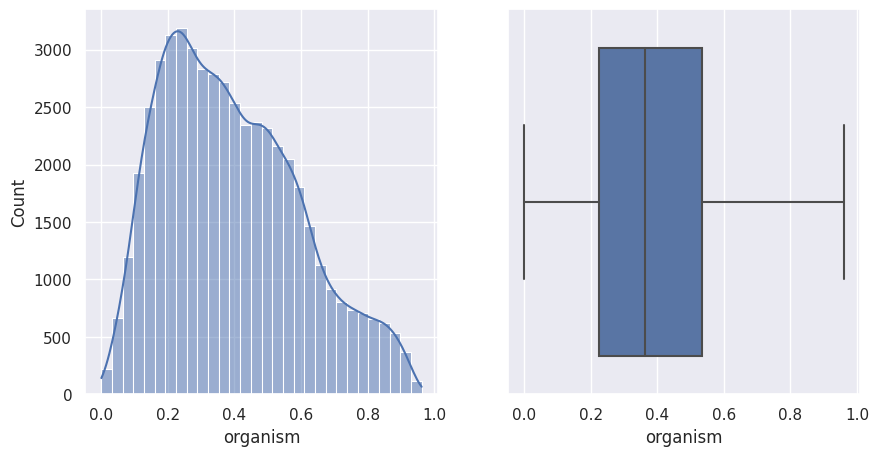

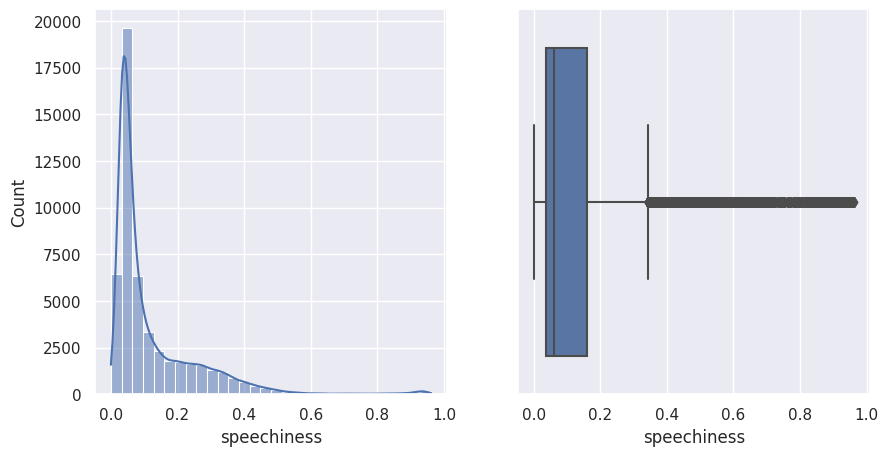

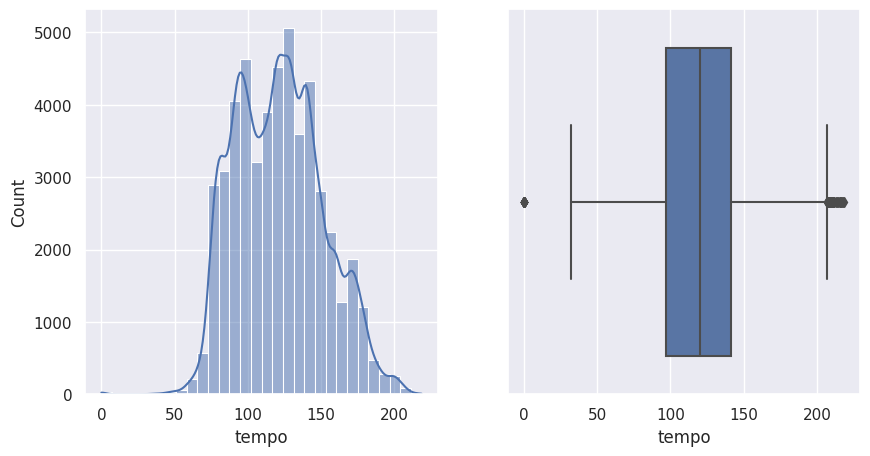

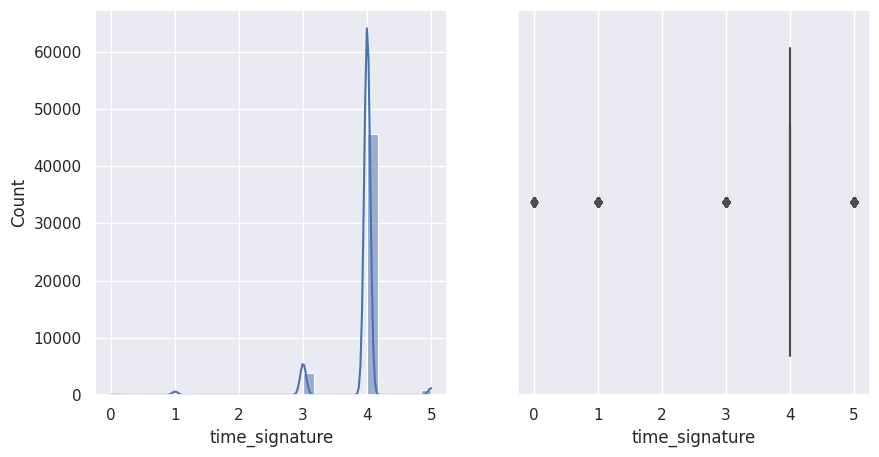

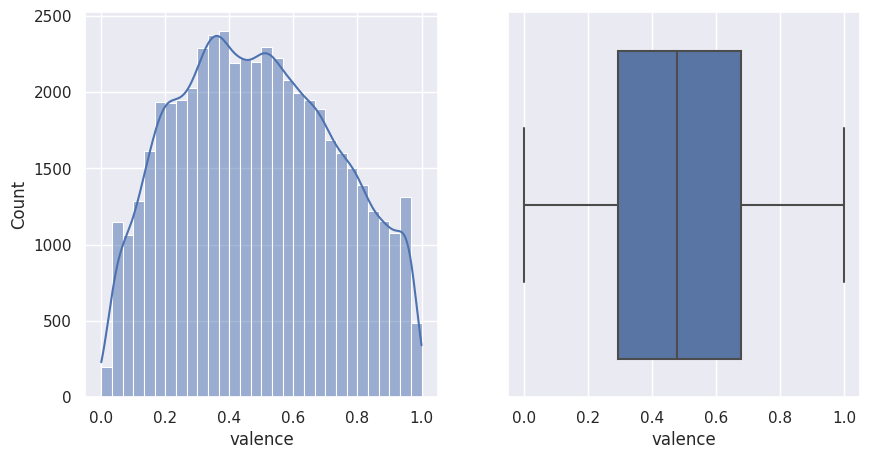

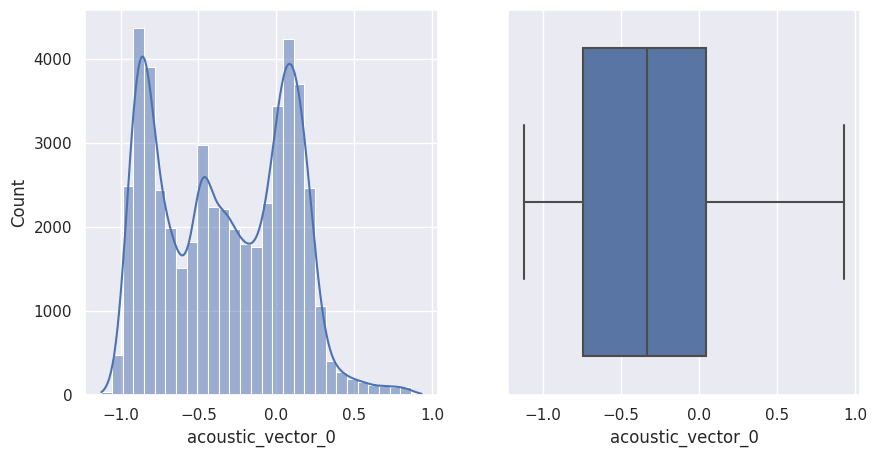

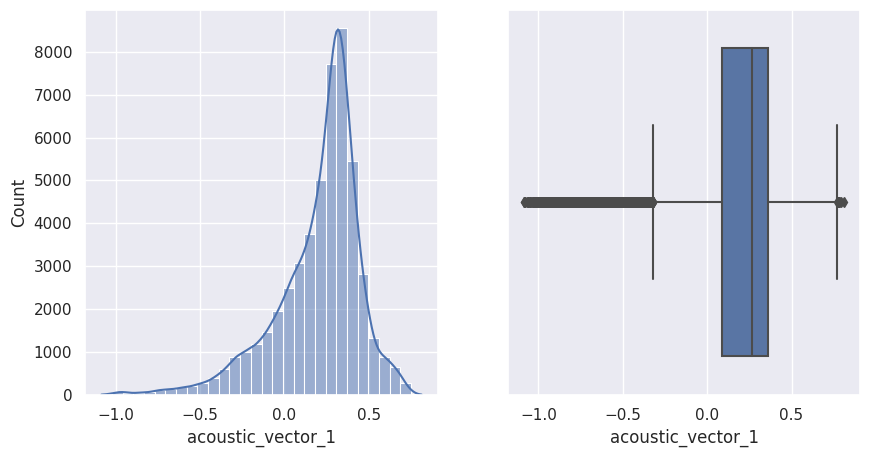

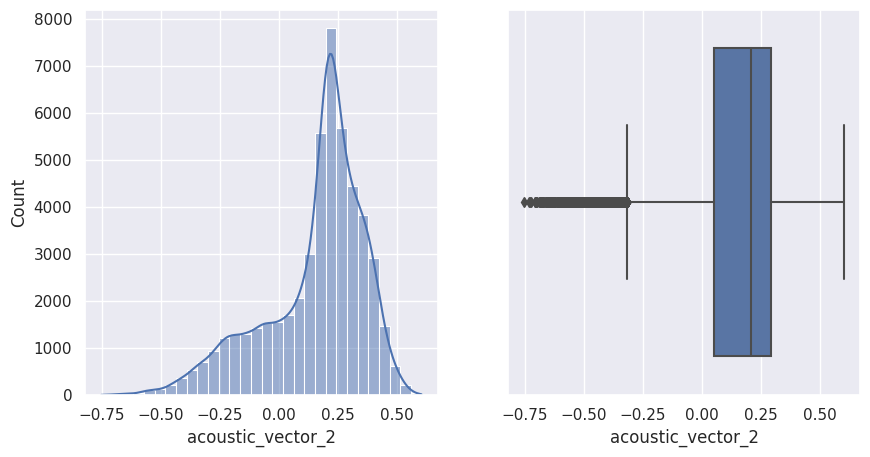

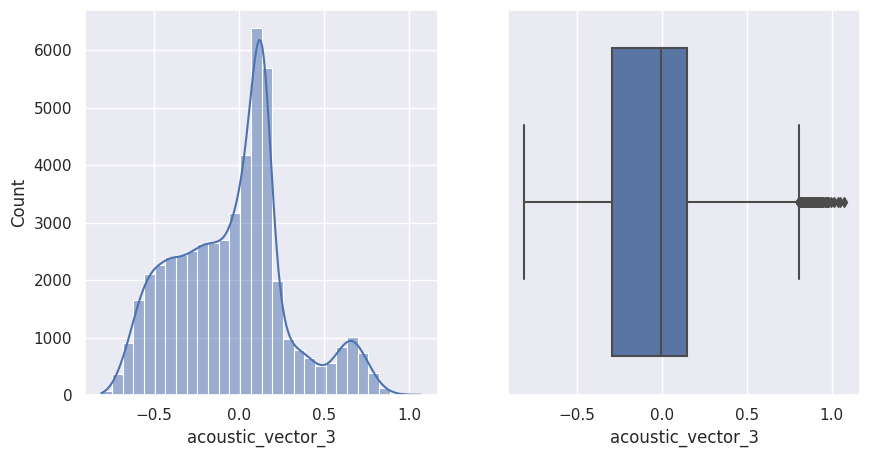

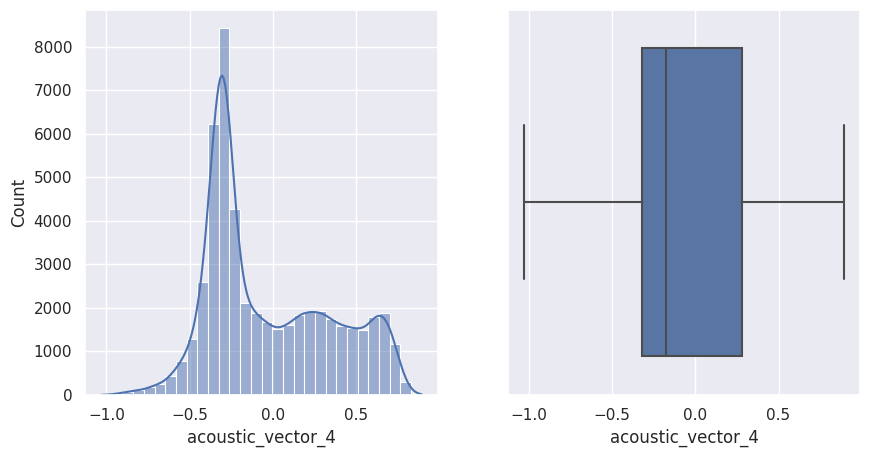

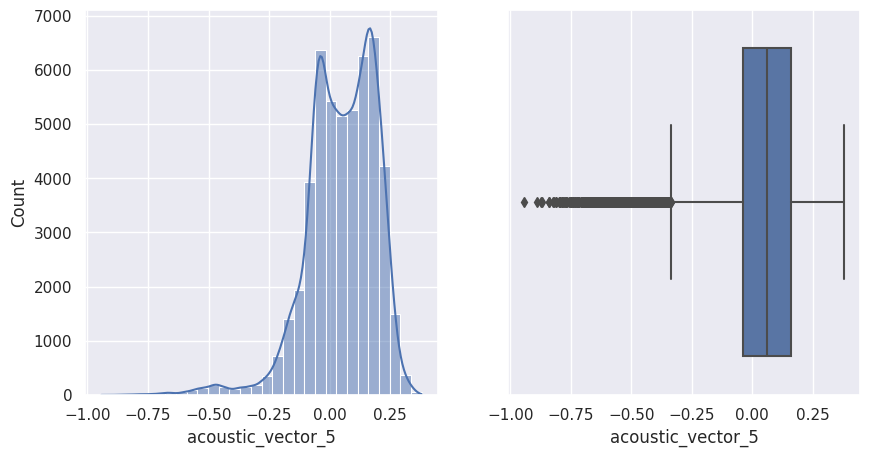

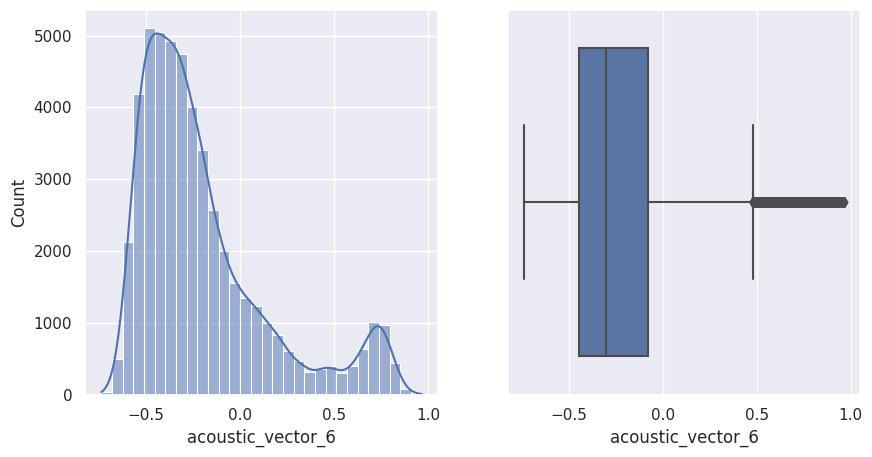

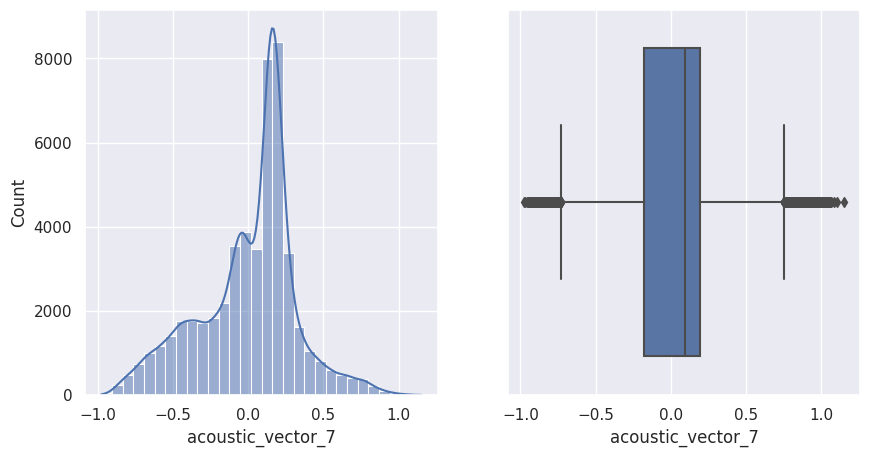

In [21]:
for i in flag:
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data=flag, x=i, bins=30, kde=True, ax = axs[0])
    sns.boxplot(x=flag[i], ax=axs[1])

In [22]:
'''
Acoustic_Vector 4
Acoustic_Vector 0
Valence
Organism
Mode
Mechanism
Key
Bounciness

No need to treat outliers
'''

'\nAcoustic_Vector 4\nAcoustic_Vector 0\nValence\nOrganism\nMode\nMechanism\nKey\nBounciness\n\nNo need to treat outliers\n'

In [23]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [24]:
track_features

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,...,4,0.542063,-0.196001,0.301727,0.238880,-0.391421,0.016690,0.247235,-0.399387,-0.192473
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,...,4,0.472353,-0.545160,0.271596,0.274377,0.043951,-0.322946,0.150802,0.159378,0.384336
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,...,4,0.766519,0.112592,0.368523,-0.466950,-0.468494,0.640088,0.050771,-0.258999,0.258766
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,...,4,0.058505,-0.855291,0.365487,0.273034,0.108294,-0.206204,0.007847,-0.408226,0.143629


In [25]:
treatment = ['duration', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'danceability', 'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']

def formula(track_features, col):

  Q1 = track_features[col].quantile(0.25)
  Q3 = track_features[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_boundary = Q1 - 1.5*IQR
  upper_boundary = Q3 + 1.5*IQR

  return lower_boundary, upper_boundary

def handle_outliers(track_features, col):

  lower_boundary, upper_boundary = formula(track_features, col)
  track_features[col] = np.where(track_features[col] > upper_boundary, upper_boundary, track_features[col])
  track_features[col] = np.where(track_features[col] < lower_boundary, lower_boundary, track_features[col])

for i in treatment:

  handle_outliers(track_features, i)

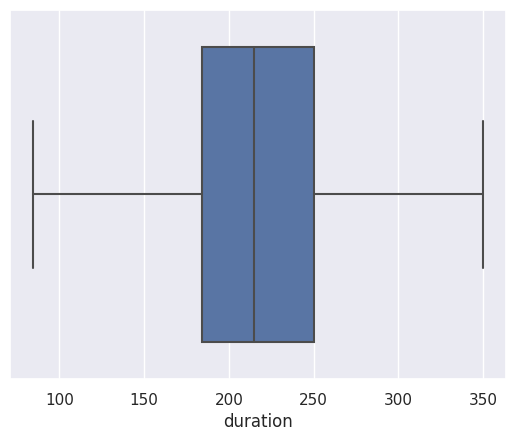

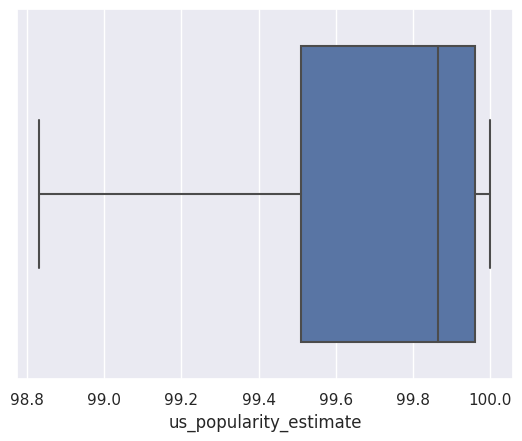

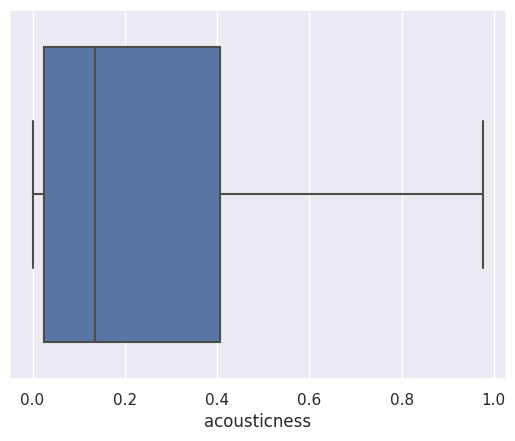

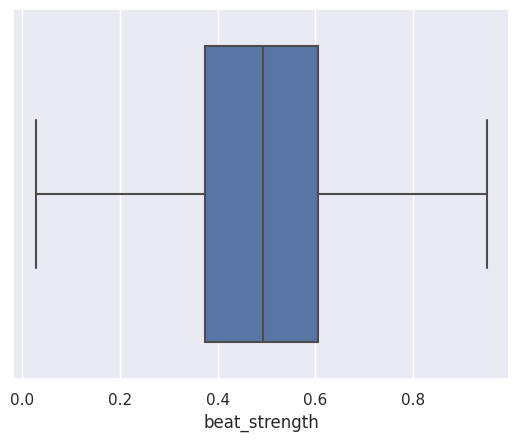

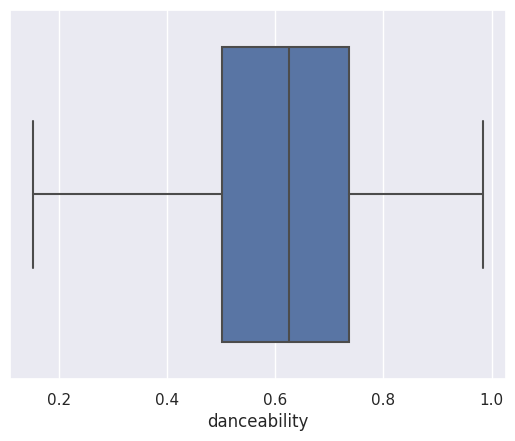

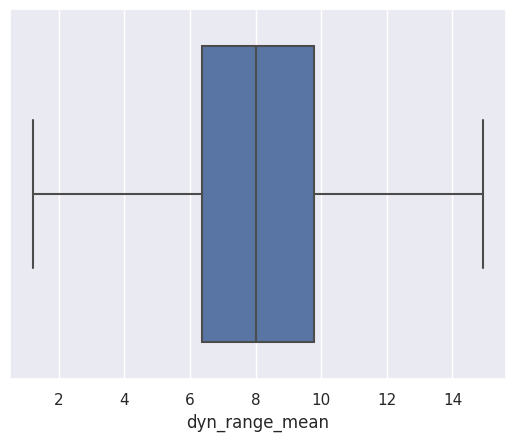

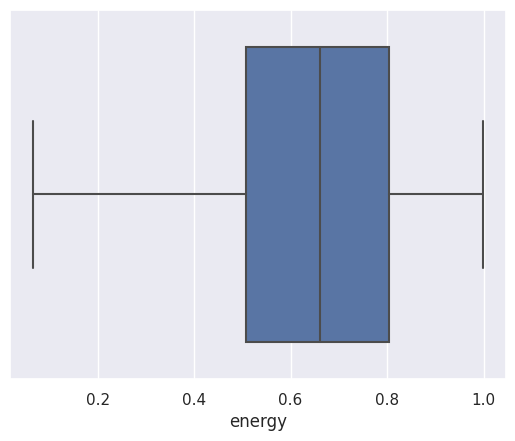

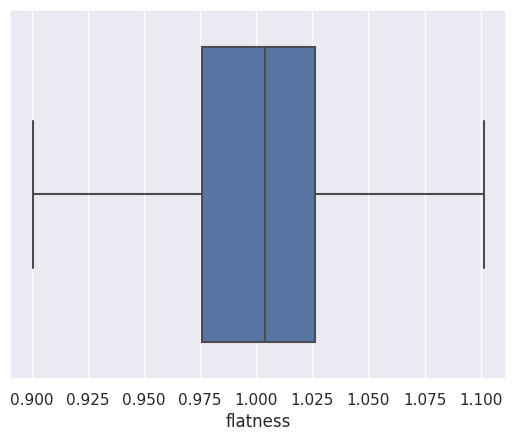

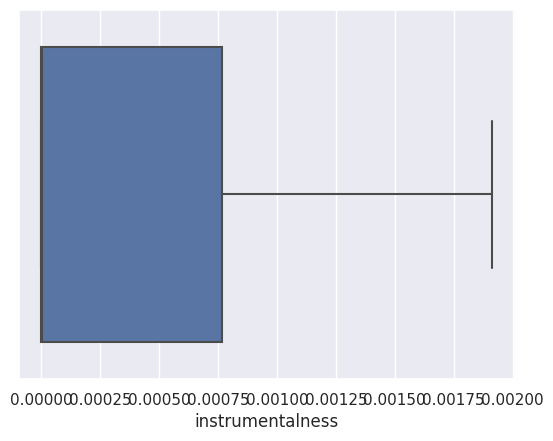

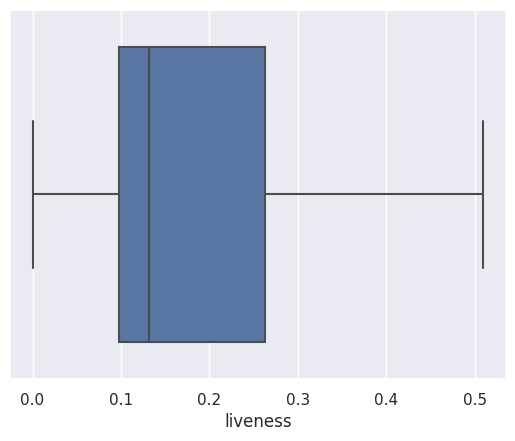

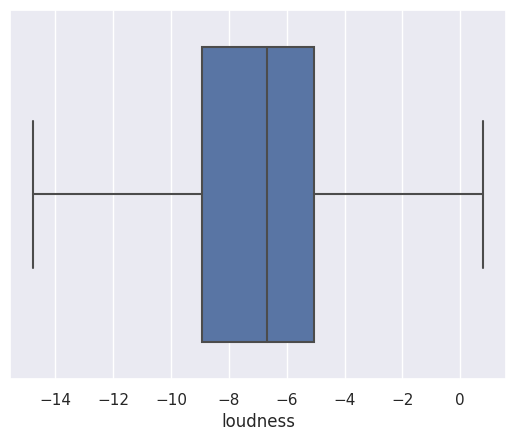

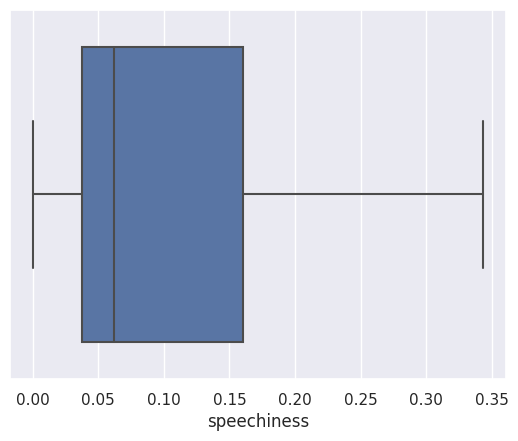

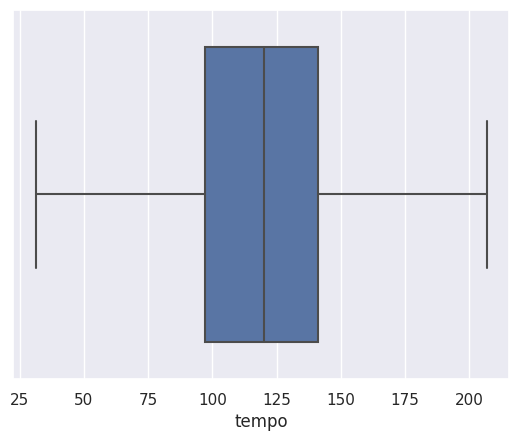

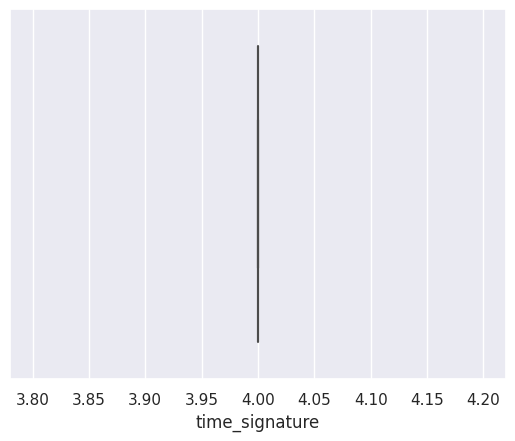

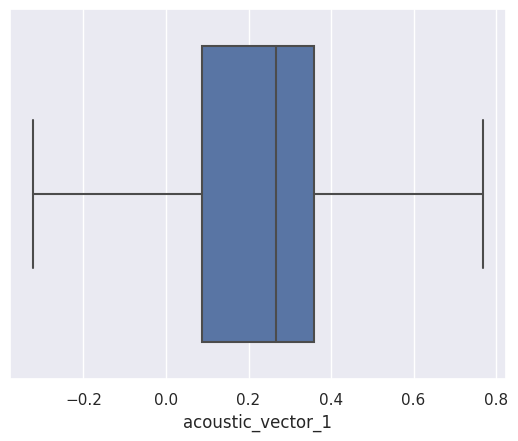

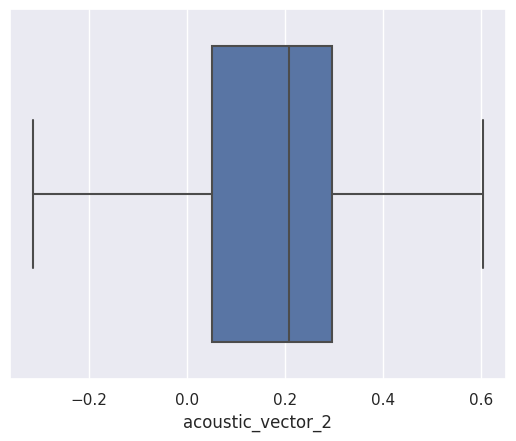

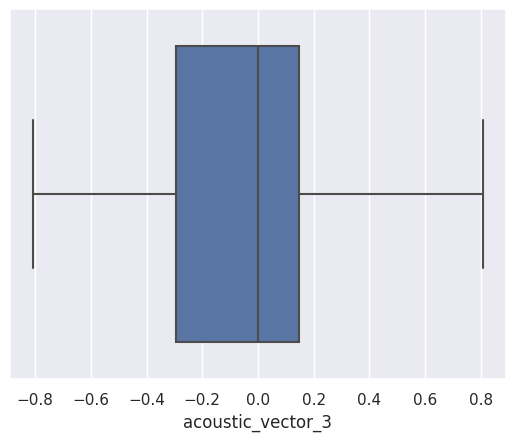

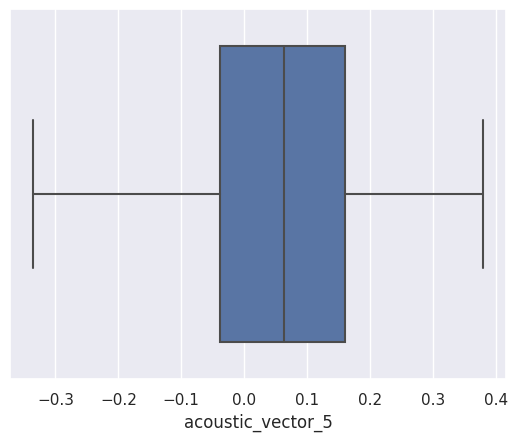

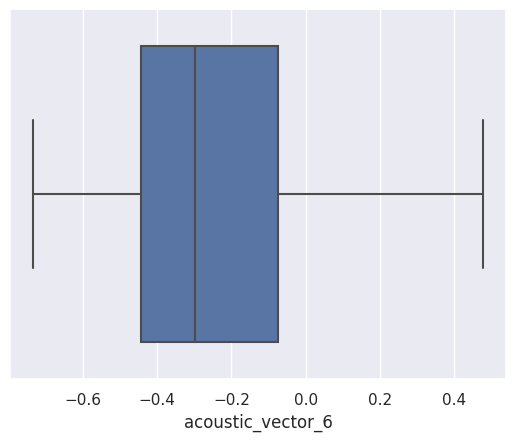

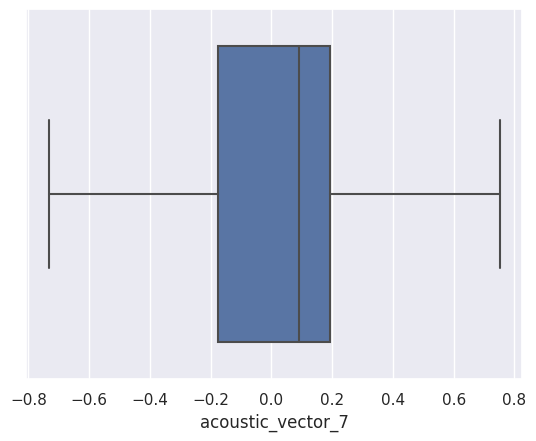

In [27]:
for i in treatment:

  sns.boxplot(x = track_features[i])
  plt.show()

In [28]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [29]:
track_features.drop(columns = 'release_year', axis = 1, inplace = True)

In [30]:
track_features.to_csv('processed_tf.csv')